In [6]:
import numpy as np
import math
import operator
import pandas as pd
import os
import time
from datetime import datetime
from time import mktime

from openpyxl import load_workbook

import matplotlib
import matplotlib.pyplot as plt

from matplotlib import style
#style.use('dark_background')
style.use('ggplot')

#import re
#import urllib
#path = "/home/juanma/Datos/owncloud_UPM/programacion/python/marcadores"
#url = "https://community.watsonanalytics.com/wp-content/uploads/2015/04/WA_Fn-UseC_-Sales-Win-Loss.csv"
#sales_data = pd.read_csv(url)
#data = pd.read_csv("iris.csv")
# data_marc_df = pd.read_excel('Data/Historia_pacientes.xlsx', header=51)
dfhist = pd.read_excel('Data/Historia_pacientes_FJD.xlsx', header=51)
dfpac= pd.read_excel('Data/Código_paciente_FJD.xlsx')
dfrec= pd.read_excel('Data/Recaidas.xlsx')
print(len(dfhist))

86


In [7]:
### crea lista de pacientes leídos en "Código_paciente.xlsx":  "pacien_list"
pacien_list0=dfpac['CODIGO PACIENTE']
pacien_list = []
for p in pacien_list0:
    if p not in pacien_list:
        pacien_list.append(p)
print(pacien_list)

['HJDP0001', 'HJDP0002', 'HJDP0003', 'HJDP0004', 'HJDP0005', 'HJDP0006', 'HJDP0007', 'HJDP0008', 'HJDP0009', 'HJDP0010', 'HJDP0011', 'HJDP0012', 'HJDP0013', 'HJDP0014', 'HJDP0015', 'HJDP0016', 'HJDP0017', 'HJDP0018', 'HJDP0019', 'HJDP0020', 'HJDP0021', 'HJDP0022', 'HJDP0023', 'HJDP0024', 'HJDP0025', 'HJDP0026', 'HJDP0027', 'HJDP0028', 'HJDP0029', 'HJDP0030', 'HJDP0031', 'HJDP0032', 'HJDP0033', 'HJDP0034', 'HJDP0035']


In [13]:
### Va abriendo TODAS los ficheros de BD de los pacientes y los va añadiendo a "dfdata0"
dfdata0 = pd.DataFrame()
for pac in pacien_list:
    filename = 'Data/paciente_' + pac + '_BD.xlsx'
    print(filename)
    data0 = pd.read_excel(filename)
    print(data0.index.values)
    dfdata0 = pd.concat([dfdata0,data0], ignore_index=True)
len(dfdata0)

Data/paciente_HJDP0001_BD.xlsx
[0 1 2 3]
Data/paciente_HJDP0002_BD.xlsx
[0 1]
Data/paciente_HJDP0003_BD.xlsx
[0]
Data/paciente_HJDP0004_BD.xlsx
[0 1]
Data/paciente_HJDP0005_BD.xlsx
[0 1 2 3 4]
Data/paciente_HJDP0006_BD.xlsx
[0 1 2 3]
Data/paciente_HJDP0007_BD.xlsx
[0]
Data/paciente_HJDP0008_BD.xlsx
[0 1 2 3 4 5]
Data/paciente_HJDP0009_BD.xlsx
[0 1 2]
Data/paciente_HJDP0010_BD.xlsx
[0 1 2 3]
Data/paciente_HJDP0011_BD.xlsx
[0 1]
Data/paciente_HJDP0012_BD.xlsx
[0 1 2 3]
Data/paciente_HJDP0013_BD.xlsx
[0 1]
Data/paciente_HJDP0014_BD.xlsx
[0 1]
Data/paciente_HJDP0015_BD.xlsx
[0 1 2]
Data/paciente_HJDP0016_BD.xlsx
[0 1 2]
Data/paciente_HJDP0017_BD.xlsx
[0 1 2 3]
Data/paciente_HJDP0018_BD.xlsx
[0 1]
Data/paciente_HJDP0019_BD.xlsx
[0 1 2]
Data/paciente_HJDP0020_BD.xlsx
[0 1 2]
Data/paciente_HJDP0021_BD.xlsx
[0 1 2 3]
Data/paciente_HJDP0022_BD.xlsx
[0 1]
Data/paciente_HJDP0023_BD.xlsx
[0 1]
Data/paciente_HJDP0024_BD.xlsx
[0 1]
Data/paciente_HJDP0025_BD.xlsx
[0 1]
Data/paciente_HJDP0026_BD.xlsx


85

In [14]:
dfdata0 = dfdata0.rename(columns={'id_caso': 'CODIGO PACIENTE', 'id_muestra': 'CODIGO MUESTRA'})
print(dfdata0.columns)
dfdata0.head(15)

Index(['Unnamed: 0', 'CODIGO PACIENTE', 'CODIGO MUESTRA', 'fecha_muestra',
       'nombre_facultativo', 'ruta_carpeta', 'fluoroforo_BCRP1',
       'limite_fluoroforo_BCRP1', 'voltaje_BCRP1', 'porcentaje_BCRP1',
       'media_BCRP1', 'mediana_BCRP1', 'fluoroforo_AC133',
       'limite_fluoroforo_AC133', 'voltaje_AC133', 'porcentaje_AC133',
       'media_AC133', 'mediana_AC133', 'porcentaje_BCRP1 AC133',
       'fluoroforo_CD133', 'limite_fluoroforo_CD133', 'voltaje_CD133',
       'porcentaje_CD133', 'media_CD133', 'mediana_CD133', 'fluoroforo_LGR5',
       'limite_fluoroforo_LGR5', 'voltaje_LGR5', 'porcentaje_LGR5',
       'media_LGR5', 'mediana_LGR5', 'porcentaje_CD133 LGR5',
       'fluoroforo_CD34', 'limite_fluoroforo_CD34', 'voltaje_CD34',
       'porcentaje_CD34', 'media_CD34', 'mediana_CD34', 'fluoroforo_EPCAM',
       'limite_fluoroforo_EPCAM', 'voltaje_EPCAM', 'porcentaje_EPCAM',
       'media_EPCAM', 'mediana_EPCAM', 'porcentaje_CD34 EPCAM',
       'fluoroforo_CD166', 'limite_f

,Unnamed: 0,CODIGO PACIENTE,CODIGO MUESTRA,fecha_muestra,nombre_facultativo,ruta_carpeta,fluoroforo_BCRP1,limite_fluoroforo_BCRP1,voltaje_BCRP1,porcentaje_BCRP1,...,porcentaje_CD44,media_CD44,mediana_CD44,porcentaje_TROP2 CD44,fluoroforo_CD36,limite_fluoroforo_CD36,voltaje_CD36,porcentaje_CD36,media_CD36,mediana_CD36
0,0,HJDP0001,HJD0001,17/02/2021,Marta Sánchez,NaN,PE,197,400,92.839,...,24.800,180,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,HJDP0001,HJD0023,15/06/2021,Marta Sánchez,NaN,PE,146,400,78.500,...,100.000,8921,9059,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,HJDP0001,HJD0083,08/02/2022,Marta Sánchez,NaN,PE,197,400,0.098,...,97.400,4680,4389,0.0,PE,197.0,400.0,3.030,4295.0,1345.0
3,3,HJDP0001,HJD0086,22/02/2022,Marta Sánchez,NaN,PE,197,400,0.000,...,97.300,4624,4108,0.0,PE,197.0,400.0,7.940,4329.0,3716.0
4,0,HJDP0002,HJD0002,17/02/2021,Marta Sánchez,NaN,PE,197,400,99.200,...,11.600,164,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,HJDP0002,HJD0068,20/12/2021,Marta Sánchez,NaN,PE,97,400,0.130,...,92.900,2297,2155,0.0,PE,97.0,400.0,14.400,772.0,540.0
6,0,HJDP0003,HJD0003,18/02/2021,Marta Sánchez,NaN,PE,120,400,96.400,...,34.800,137,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0,HJDP0004,HJD0004,18/02/2021,Marta Sánchez,NaN,PE,120,400,96.700,...,24.409,146,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,HJDP0004,HJD0094,24/02/2022,Marta Sánchez,NaN,PE,197,400,0.000,...,99.031,5061,4791,0.0,PE,197.0,400.0,2.136,1983.0,652.0
9,0,HJDP0005,HJD0005,18/02/2021,Marta Sánchez,NaN,PE,242,400,90.500,...,8.020,166,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
if 'CODIGO MUESTRA' in dfdata0.columns:
    dfdata0.set_index('CODIGO MUESTRA', inplace=True)

In [16]:
columns0 = ['CODIGO PACIENTE', 'fecha_muestra']
col_marks = [c for c in dfdata0.columns if 'porcentaje' in c]
col_selec = columns0 + col_marks
print(col_selec)
# dfdata 

['CODIGO PACIENTE', 'fecha_muestra', 'porcentaje_BCRP1', 'porcentaje_AC133', 'porcentaje_BCRP1 AC133', 'porcentaje_CD133', 'porcentaje_LGR5', 'porcentaje_CD133 LGR5', 'porcentaje_CD34', 'porcentaje_EPCAM', 'porcentaje_CD34 EPCAM', 'porcentaje_CD166', 'porcentaje_DCLK1', 'porcentaje_CD166 DCLK1', 'porcentaje_RAGE', 'porcentaje_CD44V6', 'porcentaje_RAGE CD44V6', 'porcentaje_TROP2', 'porcentaje_CD44', 'porcentaje_TROP2 CD44', 'porcentaje_CD36']


In [17]:
dfdata = dfdata0[col_selec]
print(dfdata.columns)
print(dfdata.index)
print(len(dfdata))

Index(['CODIGO PACIENTE', 'fecha_muestra', 'porcentaje_BCRP1',
       'porcentaje_AC133', 'porcentaje_BCRP1 AC133', 'porcentaje_CD133',
       'porcentaje_LGR5', 'porcentaje_CD133 LGR5', 'porcentaje_CD34',
       'porcentaje_EPCAM', 'porcentaje_CD34 EPCAM', 'porcentaje_CD166',
       'porcentaje_DCLK1', 'porcentaje_CD166 DCLK1', 'porcentaje_RAGE',
       'porcentaje_CD44V6', 'porcentaje_RAGE CD44V6', 'porcentaje_TROP2',
       'porcentaje_CD44', 'porcentaje_TROP2 CD44', 'porcentaje_CD36'],
      dtype='object')
Index(['HJD0001', 'HJD0023', 'HJD0083', 'HJD0086', 'HJD0002', 'HJD0068',
       'HJD0003', 'HJD0004', 'HJD0094', 'HJD0005', 'HJD0010', 'HJD0025',
       'HJD0064', 'HJD0096', 'HJD0006', 'HJD0022', 'HJD0045', 'HJD0101',
       'HJD0007', 'HJD0008', 'HJD0026', 'HJD0034', 'HJD0042', 'HJD0056',
       'HJD0077', 'HJD0009', 'HJD0018', 'HJD0047', 'HJD0011', 'HJD0020',
       'HJD0050', 'HJD0061', 'HJD0012', 'HJD0019', 'HJD0013', 'HJD0052',
       'HJD0062', 'HJD0095', 'HJD0014', 'HJD0

In [18]:
print(dfhist.columns)

Index(['CODIGO PACIENTE', 'FECHA NAC', 'GENERO', 'MEDICO',
       'ANTECEDENTES FAMILIARES', 'CODIGO MUESTRA', 'FECHA MUESTRA',
       'ULTIMO SEGUIMIENTO', 'ESTADO', 'ESTADIO AL DX',
       ...
       'C3 2L POST', 'BIOL 2L', 'INICIO BIOL 2L', 'FINAL BIOL 2L',
       'CONCENTRACIÓN BIOL 2L', 'TOXICIDAD 2L', 'FECHA TOXICIDAD 2L',
       'REDUCCION DOSIS 2L', 'FECHA REDUCCION DOSIS 2L', 'EC2L'],
      dtype='object', length=136)


In [19]:
if 'CODIGO MUESTRA' in dfhist.columns:
    dfhist.set_index('CODIGO MUESTRA', inplace=True)

In [20]:
dfhist.index

Index(['HJD0001', 'HJD0002', 'HJD0003', 'HJD0004', 'HJD0005', 'HJD0006',
       'HJD0007', 'HJD0008', 'HJD0009', 'HJD0010', 'HJD0011', 'HJD0012',
       'HJD0013', 'HJD0014', 'HJD0015', 'HJD0016', 'HJD0017', 'HJD0018',
       'HJD0019', 'HJD0020', 'HJD0021', 'HJD0022', 'HJD0023', 'HJD0024',
       'HJD0025', 'HJD0026', 'HJD0027', 'HJD0028', 'HJD0029', 'HJD0030',
       'HJD0031', 'HJD0032', 'HJD0033', 'HJD0034', 'HJD0035', 'HJD0036',
       'HJD0037', 'HJD0038', 'HJD0039', 'HJD0040', 'HJD0041', 'HJD0042',
       'HJD0043', 'HJD0044', 'HJD0045', 'HJD0046', 'HJD0047', 'HJD0048',
       'HJD0049', 'HJD0050', 'HJD0051', 'HJD0052', 'HJD0043', 'HJD0054',
       'HJD0055', 'HJD0056', 'HJD0057', 'HJD0058', 'HJD0059', 'HJD0060',
       'HJD0061', 'HJD0062', 'HJD0063', 'HJD0064', 'HJD0065', 'HJD0066',
       'HJD0067', 'HJD0068', 'HJD0073', 'HJD0074', 'HJD0075', 'HJD0076',
       'HJD0077', 'HJD0078', 'HJD0079', 'HJD0080', 'HJD0081', 'HJD0082',
       'HJD0083', 'HJD0084', 'HJD0085', 'HJD0086', 

In [21]:
dfrec.columns
if 'CODIGO MUESTRA' in dfrec.columns:
    dfrec.set_index('CODIGO MUESTRA', inplace=True)
    
dfrec.index
print(dfrec.columns)

Index(['CODIGO PACIENTE', 'FECHA MUESTRA', 'FECHA DX 1L', 'FECHA DX 2L',
       'T_recaida1', 'T_recaida2', 'CEA', 'C19-9', 'EDAD'],
      dtype='object')


In [22]:
dfrec = dfrec[~dfrec.index.duplicated(keep='first')]
dfrec.columns
print(dfrec.index.values)
print(len(dfrec))

['HJD0001' 'HJD0002' 'HJD0003' 'HJD0004' 'HJD0005' 'HJD0006' 'HJD0007'
 'HJD0008' 'HJD0009' 'HJD0010' 'HJD0011' 'HJD0012' 'HJD0013' 'HJD0014'
 'HJD0015' 'HJD0016' 'HJD0017' 'HJD0018' 'HJD0019' 'HJD0020' 'HJD0021'
 'HJD0022' 'HJD0023' 'HJD0024' 'HJD0025' 'HJD0026' 'HJD0027' 'HJD0028'
 'HJD0029' 'HJD0030' 'HJD0031' 'HJD0032' 'HJD0033' 'HJD0034' 'HJD0035'
 'HJD0036' 'HJD0037' 'HJD0038' 'HJD0039' 'HJD0040' 'HJD0041' 'HJD0042'
 'HJD0043' 'HJD0044' 'HJD0045' 'HJD0046' 'HJD0047' 'HJD0048' 'HJD0049'
 'HJD0050' 'HJD0051' 'HJD0052' 'HJD0054' 'HJD0055' 'HJD0056' 'HJD0057'
 'HJD0058' 'HJD0059' 'HJD0060' 'HJD0061' 'HJD0062' 'HJD0063' 'HJD0064'
 'HJD0065' 'HJD0066' 'HJD0067' 'HJD0068' 'HJD0073' 'HJD0074' 'HJD0075'
 'HJD0076' 'HJD0077' 'HJD0078' 'HJD0079' 'HJD0080' 'HJD0081' 'HJD0082'
 'HJD0083' 'HJD0084' 'HJD0085' 'HJD0086' 'HJD0093' 'HJD0094' 'HJD0095'
 'HJD0096']
85


In [23]:
dfdata = dfdata[~dfdata.index.duplicated(keep='first')]
print(dfdata.columns)
print(dfdata.index.values)
print(len(dfdata))

Index(['CODIGO PACIENTE', 'fecha_muestra', 'porcentaje_BCRP1',
       'porcentaje_AC133', 'porcentaje_BCRP1 AC133', 'porcentaje_CD133',
       'porcentaje_LGR5', 'porcentaje_CD133 LGR5', 'porcentaje_CD34',
       'porcentaje_EPCAM', 'porcentaje_CD34 EPCAM', 'porcentaje_CD166',
       'porcentaje_DCLK1', 'porcentaje_CD166 DCLK1', 'porcentaje_RAGE',
       'porcentaje_CD44V6', 'porcentaje_RAGE CD44V6', 'porcentaje_TROP2',
       'porcentaje_CD44', 'porcentaje_TROP2 CD44', 'porcentaje_CD36'],
      dtype='object')
['HJD0001' 'HJD0023' 'HJD0083' 'HJD0086' 'HJD0002' 'HJD0068' 'HJD0003'
 'HJD0004' 'HJD0094' 'HJD0005' 'HJD0010' 'HJD0025' 'HJD0064' 'HJD0096'
 'HJD0006' 'HJD0022' 'HJD0045' 'HJD0101' 'HJD0007' 'HJD0008' 'HJD0026'
 'HJD0034' 'HJD0042' 'HJD0056' 'HJD0077' 'HJD0009' 'HJD0018' 'HJD0047'
 'HJD0011' 'HJD0020' 'HJD0050' 'HJD0061' 'HJD0012' 'HJD0019' 'HJD0013'
 'HJD0052' 'HJD0062' 'HJD0095' 'HJD0014' 'HJD0074' 'HJD0015' 'HJD0063'
 'HJD0016' 'HJD0030' 'HJD0040' 'HJD0017' 'HJD0024' 'HJD00

In [24]:
dfhist = dfhist[~dfhist.index.duplicated(keep='first')]
print(dfhist.columns)
print(dfhist.index.values)
print(len(dfhist))

Index(['CODIGO PACIENTE', 'FECHA NAC', 'GENERO', 'MEDICO',
       'ANTECEDENTES FAMILIARES', 'FECHA MUESTRA', 'ULTIMO SEGUIMIENTO',
       'ESTADO', 'ESTADIO AL DX', 'FUMADOR',
       ...
       'C3 2L POST', 'BIOL 2L', 'INICIO BIOL 2L', 'FINAL BIOL 2L',
       'CONCENTRACIÓN BIOL 2L', 'TOXICIDAD 2L', 'FECHA TOXICIDAD 2L',
       'REDUCCION DOSIS 2L', 'FECHA REDUCCION DOSIS 2L', 'EC2L'],
      dtype='object', length=135)
['HJD0001' 'HJD0002' 'HJD0003' 'HJD0004' 'HJD0005' 'HJD0006' 'HJD0007'
 'HJD0008' 'HJD0009' 'HJD0010' 'HJD0011' 'HJD0012' 'HJD0013' 'HJD0014'
 'HJD0015' 'HJD0016' 'HJD0017' 'HJD0018' 'HJD0019' 'HJD0020' 'HJD0021'
 'HJD0022' 'HJD0023' 'HJD0024' 'HJD0025' 'HJD0026' 'HJD0027' 'HJD0028'
 'HJD0029' 'HJD0030' 'HJD0031' 'HJD0032' 'HJD0033' 'HJD0034' 'HJD0035'
 'HJD0036' 'HJD0037' 'HJD0038' 'HJD0039' 'HJD0040' 'HJD0041' 'HJD0042'
 'HJD0043' 'HJD0044' 'HJD0045' 'HJD0046' 'HJD0047' 'HJD0048' 'HJD0049'
 'HJD0050' 'HJD0051' 'HJD0052' 'HJD0054' 'HJD0055' 'HJD0056' 'HJD0057'
 'HJD00

In [25]:
# print(dfdata0.index)
i_col_T1 = list(dfrec.columns.values).index('T_recaida1')
i_col_T2 = list(dfrec.columns.values).index('T_recaida2')
print('columna T1:',i_col_T1,'columna T2:',i_col_T2)
for m in dfdata.index:
    p = dfdata.loc[m,'CODIGO PACIENTE']
    print('m:',m, 'p:',p)
    if m in dfrec.index.values:
        t1 = dfrec.loc[m,'T_recaida1']
        t2 = dfrec.loc[m,'T_recaida2']
        print(m, p, 'está en dfrec. Tiempos de recaída:',t1,t2)

        if t1>=0:
            dfdata.loc[m,'T_recaida1']= t1
            print('en dfdata 1ª recaída:',dfdata.loc[m,'T_recaida1'])
        if t2>=0:
            dfdata.loc[m,'T_recaida2']= t2
            print('en dfdata 2ª recaída:',dfdata.loc[m,'T_recaida2'])
       
    
    

columna T1: 4 columna T2: 5
m: HJD0001 p: HJDP0001
HJD0001 HJDP0001 está en dfrec. Tiempos de recaída: 352.0 nan
en dfdata 1ª recaída: 352.0
m: HJD0023 p: HJDP0001
HJD0023 HJDP0001 está en dfrec. Tiempos de recaída: 234.0 nan
en dfdata 1ª recaída: 234.0
m: HJD0083 p: HJDP0001
HJD0083 HJDP0001 está en dfrec. Tiempos de recaída: -4.0 nan
m: HJD0086 p: HJDP0001
HJD0086 HJDP0001 está en dfrec. Tiempos de recaída: -18.0 nan
m: HJD0002 p: HJDP0002
HJD0002 HJDP0002 está en dfrec. Tiempos de recaída: nan nan
m: HJD0068 p: HJDP0002
HJD0068 HJDP0002 está en dfrec. Tiempos de recaída: nan nan
m: HJD0003 p: HJDP0003
HJD0003 HJDP0003 está en dfrec. Tiempos de recaída: nan nan
m: HJD0004 p: HJDP0004
HJD0004 HJDP0004 está en dfrec. Tiempos de recaída: nan nan
m: HJD0094 p: HJDP0004
HJD0094 HJDP0004 está en dfrec. Tiempos de recaída: nan nan
m: HJD0005 p: HJDP0005
HJD0005 HJDP0005 está en dfrec. Tiempos de recaída: -34.0 167.0
en dfdata 2ª recaída: 167.0
m: HJD0010 p: HJDP0005
HJD0010 HJDP0005 está en

In [26]:
dfdata.head(12)

,CODIGO PACIENTE,fecha_muestra,porcentaje_BCRP1,porcentaje_AC133,porcentaje_BCRP1 AC133,porcentaje_CD133,porcentaje_LGR5,porcentaje_CD133 LGR5,porcentaje_CD34,porcentaje_EPCAM,...,porcentaje_CD166 DCLK1,porcentaje_RAGE,porcentaje_CD44V6,porcentaje_RAGE CD44V6,porcentaje_TROP2,porcentaje_CD44,porcentaje_TROP2 CD44,porcentaje_CD36,T_recaida1,T_recaida2
CODIGO MUESTRA,,,,,,,,,,,,,,,,,,,,,
HJD0001,HJDP0001,17/02/2021,92.839,58.139,NaN,63.939,NaN,NaN,NaN,10.800,...,NaN,NaN,NaN,NaN,NaN,24.800,NaN,NaN,352.0,NaN
HJD0023,HJDP0001,15/06/2021,78.500,4.170,NaN,23.400,80.000,NaN,76.100,0.000,...,NaN,NaN,86.200,NaN,8.250,100.000,NaN,NaN,234.0,NaN
HJD0083,HJDP0001,08/02/2022,0.098,0.200,0.0,0.480,40.100,0.240,0.140,0.140,...,0.000,0.000,0.000,0.0,0.000,97.400,0.0,3.030,NaN,NaN
HJD0086,HJDP0001,22/02/2022,0.000,0.000,0.0,0.000,0.230,0.000,0.000,0.000,...,0.000,0.000,1.620,0.0,0.072,97.300,0.0,7.940,NaN,NaN
HJD0002,HJDP0002,17/02/2021,99.200,52.600,NaN,56.800,NaN,NaN,NaN,6.430,...,NaN,NaN,NaN,NaN,NaN,11.600,NaN,NaN,NaN,NaN
HJD0068,HJDP0002,20/12/2021,0.130,0.022,0.0,0.071,2.640,0.000,0.200,0.049,...,0.000,0.022,0.045,0.0,0.000,92.900,0.0,14.400,NaN,NaN
HJD0003,HJDP0003,18/02/2021,96.400,77.300,NaN,70.700,NaN,NaN,NaN,14.300,...,NaN,NaN,NaN,NaN,NaN,34.800,NaN,NaN,NaN,NaN
HJD0004,HJDP0004,18/02/2021,96.700,70.700,NaN,71.700,NaN,NaN,NaN,13.709,...,NaN,NaN,NaN,NaN,NaN,24.409,NaN,NaN,NaN,NaN
HJD0094,HJDP0004,24/02/2022,0.000,0.000,0.0,0.096,0.131,0.066,0.326,0.051,...,0.069,0.000,0.161,0.0,0.000,99.031,0.0,2.136,NaN,NaN


In [27]:
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, HJD0001 to HJD0081
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CODIGO PACIENTE         85 non-null     object 
 1   fecha_muestra           85 non-null     object 
 2   porcentaje_BCRP1        85 non-null     float64
 3   porcentaje_AC133        85 non-null     float64
 4   porcentaje_BCRP1 AC133  26 non-null     float64
 5   porcentaje_CD133        85 non-null     float64
 6   porcentaje_LGR5         80 non-null     float64
 7   porcentaje_CD133 LGR5   25 non-null     float64
 8   porcentaje_CD34         80 non-null     float64
 9   porcentaje_EPCAM        85 non-null     float64
 10  porcentaje_CD34 EPCAM   23 non-null     float64
 11  porcentaje_CD166        72 non-null     float64
 12  porcentaje_DCLK1        55 non-null     float64
 13  porcentaje_CD166 DCLK1  35 non-null     float64
 14  porcentaje_RAGE         22 non-null   

## Ahora buscamos correlaciones

In [54]:
dfdata.columns

Index(['CODIGO PACIENTE', 'fecha_muestra', 'porcentaje_BCRP1',
       'porcentaje_AC133', 'porcentaje_BCRP1 AC133', 'porcentaje_CD133',
       'porcentaje_LGR5', 'porcentaje_CD133 LGR5', 'porcentaje_CD34',
       'porcentaje_EPCAM', 'porcentaje_CD34 EPCAM', 'porcentaje_CD166',
       'porcentaje_DCLK1', 'porcentaje_CD166 DCLK1', 'porcentaje_RAGE',
       'porcentaje_CD44V6', 'porcentaje_RAGE CD44V6', 'porcentaje_TROP2',
       'porcentaje_CD44', 'porcentaje_TROP2 CD44', 'porcentaje_CD36',
       'T_recaida1', 'T_recaida2'],
      dtype='object')

In [55]:
cols = ['CODIGO PACIENTE','porcentaje_BCRP1',
       'porcentaje_AC133', 'porcentaje_CD133',
       'porcentaje_LGR5', 'porcentaje_CD34',
       'porcentaje_EPCAM', 'porcentaje_CD166',
       'porcentaje_DCLK1', 'porcentaje_RAGE',
       'porcentaje_CD44V6', 'porcentaje_TROP2',
       'porcentaje_CD44', 'porcentaje_CD36',
       'T_recaida1', 'T_recaida2']
dfdata2 = dfdata[cols]

In [61]:
### Los NaN pasarlo primero a string (.astype(str)) y luego comparar con 'nan' (en minúscula)
dfdata_bin = dfdata2.copy()
dfdata_bin.reset_index()
dfdata_bin['T_recaida1'] = dfdata_bin['T_recaida1'].astype(str)

dfdata_bin.loc[dfdata_bin['T_recaida1']!='nan','T_recaida1']=1 
dfdata_bin.loc[dfdata_bin['T_recaida1']=='nan','T_recaida1']=0 

dfdata_bin['T_recaida2'] = dfdata_bin['T_recaida2'].astype(str)
dfdata_bin.loc[dfdata_bin['T_recaida2']!='nan','T_recaida2']=1 
dfdata_bin.loc[dfdata_bin['T_recaida2']=='nan','T_recaida2']=0 
# print(dfdata_bin.head(15))
dfdata_bin.to_excel('Data/Marcadores_t_recaidas.xlsx')
dfdata_bin.to_csv('Data/Marcadores_t_recaidas.csv', index=False)


In [21]:
cols_invas = ['porcentaje_LGR5', 'porcentaje_DCLK1', 'porcentaje_RAGE',
       'porcentaje_CD44V6', 'porcentaje_TROP2',
       'porcentaje_CD44', 'porcentaje_CD36',
       'T_recaida1', 'T_recaida2']
cols_adh = ['porcentaje_EPCAM', 'porcentaje_CD166', 'T_recaida1', 'T_recaida2']
cols_autoren = [ 'porcentaje_AC133', 'porcentaje_CD133', 'porcentaje_CD34', 'T_recaida1', 'T_recaida2']
cols_tox = ['porcentaje_BCRP1',  'T_recaida1', 'T_recaida2']
dfdata_invas = dfdata[cols_invas]
dfdata_adh = dfdata[cols_adh]
dfdata_autoren = dfdata[cols_autoren]
dfdata_tox = dfdata[cols_tox]
print(dfdata_invas.columns)

Index(['porcentaje_LGR5', 'porcentaje_DCLK1', 'porcentaje_RAGE',
       'porcentaje_CD44V6', 'porcentaje_TROP2', 'porcentaje_CD44',
       'porcentaje_CD36', 'T_recaida1', 'T_recaida2'],
      dtype='object')


In [22]:
mat_covar = dfdata2.cov()

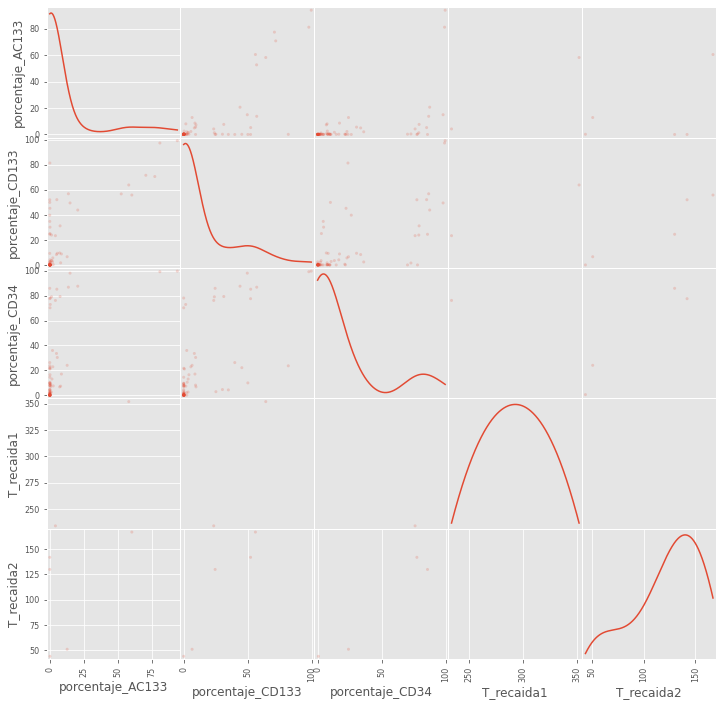

In [28]:
from pandas.plotting import scatter_matrix
scatter_matrix(dfdata_autoren, alpha=0.2, figsize=(12, 12), diagonal='kde');

In [24]:
dfdata_tox.loc[dfdata_tox['porcentaje_BCRP1']!=np.nan]

,porcentaje_BCRP1,T_recaida1,T_recaida2
CODIGO MUESTRA,,,
HJD0001,92.839,352.0,NaN
HJD0023,78.500,234.0,NaN
HJD0083,0.098,NaN,NaN
HJD0086,0.000,NaN,NaN
HJD0002,99.200,NaN,NaN
...,...,...,...
HJD0067,1.560,NaN,NaN
HJD0075,0.880,NaN,NaN
HJD0076,0.000,NaN,NaN


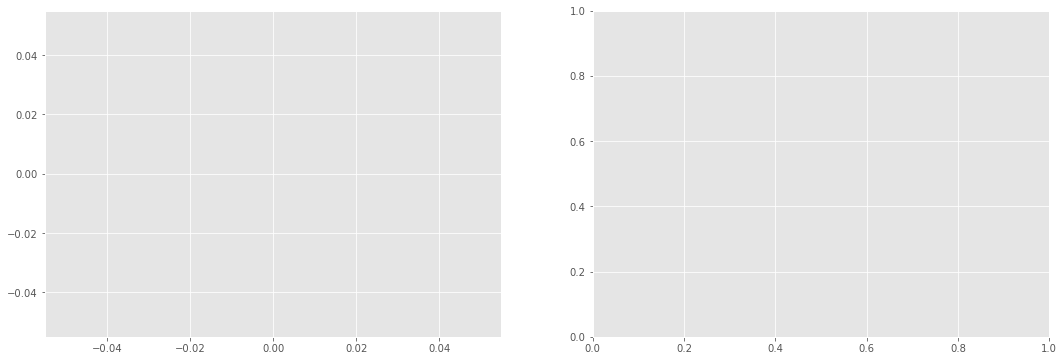

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
df0 = dfdata_tox.dropna()
for col in dfdata_tox.columns:
    plot_data = df0[col]
    plot_x = df0['T_recaida1']
    ax1.plot(plot_x.values, plot_data.values,'bo', label=col)

In [ ]:
dfdata_invas.loc[dfdata_invas['porcentaje_BCRP1']!=np.nan]

In [ ]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [ ]:
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [ ]:
def clean_nonumber(df,col):
    nan_value = float("NaN")
    for r in df.index:
        if type(df[col][r])!=float and type(df[col][r])!=int and type(df[col][r])!=np.float64 and type(df[col][r])!=np.int32:
            print('r sin valores:',r)
            print(type(df[col][r]))
            df.loc[r,col]=nan_value
    return df
#dfplot.tail(25)

In [ ]:
cols=['AC133','CD133', 'BCRP1', 'EpCAM', 'SEMESTRE']
df2 = df.copy()
for col in cols:
    print('col:',col)
    df2= clean_nonumber(df2,col)
###### REPETIR ESTO PARA TODAS LAS COLUMNAS

In [ ]:
df2.tail(25)

In [ ]:
# QUITAR LAS FILAS QUE TENGAN ALGÚN NAN

In [ ]:
def clean_nan(df,cols):
    #print(df.tail(25))
    df_cols = df[cols]
    df2 = df_cols.copy()
    df2.dropna(axis=0,how='any', inplace=True)
    #print(df2.tail(25))
    return df2


In [ ]:
#print(df2.tail(10))
df3 = df2[cols].copy()
#print(df3.tail(15))
df_clean=df3.dropna(axis=0, how='any', inplace=False)
df_clean.tail(25)

In [ ]:
df_sem0 = df_clean[df_clean['SEMESTRE']==0]
print(len(df_sem0))
#df_sem0.head(20)

In [ ]:
df_sem1 = df_clean[df_clean['SEMESTRE']==1]
print(len(df_sem1))

In [ ]:
df_sem2 = df_clean[df_clean['SEMESTRE']==2]
print(len(df_sem2))

In [ ]:
df_sem3 = df_clean[df_clean['SEMESTRE']==3]
print(len(df_sem3))

In [ ]:
df_sem4 = df_clean[df_clean['SEMESTRE']==4]
print(len(df_sem4))

In [ ]:
df_sem40 = df_clean[df_clean['SEMESTRE']==40]
print(len(df_sem40))

In [ ]:
df_sem0.tail()

In [ ]:
#df['SEMESTRE']=(df['MESES']/6).astype(int)
#df_clean['AÑO']=(np.floor(df_clean['SEMESTRE']/2)).astype(int)
#df_clean = df_clean.drop(['AÑO'], axis=1)
#df_clean.astype({'AC133':'float64', 'CD133':'float64','BCRP1':'float64'}).dtypes
#df_clean.tail(15)
df_clean.info()
df_clean['AÑO']=np.floor(df_clean['SEMESTRE']/2.0)
df_clean['AÑO'][:15]

In [ ]:
#df_clean.drop('AÑO', axis=0)
#df_clean.index.drop('AÑO')
df_clean = df_clean.drop(labels='AÑO', axis=0)

df_clean.tail()

In [ ]:
print(len(df_clean[df_clean['AÑO']==0]))

### Creo un nuevo DF con sólo 3 grupos: recidiva dentro del año, posterior al año y NO-recidiva

In [ ]:
df_rec=df_clean.copy()


In [ ]:
conditions = [
    (df_rec['AÑO'] < 1),
    (df_rec['AÑO'] > 0) & (df_rec['AÑO'] <20),
    (df_rec['AÑO'] >=20) 
    ]

# create a list of the values we want to assign for each condition
values = ['REC0', 'REC1_20', 'NO_REC']

# create a new column and use np.select to assign values to it using our lists as arguments
df_rec['REC'] = np.select(conditions, values)
df_rec.tail(10)

In [ ]:
print(len(df_rec[df_rec['REC']=='REC0']))
print(len(df_rec[df_rec['REC']=='REC1_20']))
print(len(df_rec[df_rec['REC']=='NO_REC']))

In [ ]:
df_an0 = df_clean[df_clean['AÑO']==0]
print(len(df_an0))
#df_sem0.head(20)
df_an1 = df_clean[df_clean['AÑO']==1]
print(len(df_an1))
df_an20 = df_clean[df_clean['AÑO']==20]
print(df_an20.head())

In [ ]:
ax = plt.gca()
df_clean.plot.scatter(x='SEMESTRE', y='AC133',c='r', alpha=0.5, ax=ax)
df_clean.plot.scatter(x='SEMESTRE', y='CD133',c='c', alpha=0.5, ax=ax)
ax.axis([0,5,0,5])

In [ ]:
df_rec['SUMA']=df_rec.loc[:,'CD133']+df_rec.loc[:,'AC133']+df_rec.loc[:,'BCRP1']+df_rec.loc[:,'EpCAM']
df_rec.tail()

In [ ]:
df_rec.dtypes

In [ ]:
df_rec.tail(5)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_rec.hist(figsize=(20,20))
plt.show()

In [ ]:
cor = df_rec.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True)

In [ ]:
df_rec.SUMA.hist(by=df_rec.REC)

# Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=2)

X = df_rec.get(key=['CD133', 'AC133','BCRP1','EpCAM'])
Y = np.ravel(df_rec.get(key=['REC']))
target = df_rec.get(key=['REC'])
#y = Y.astype('category')
##probar si es necesario cambiar de tipo

#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=0)

### Hacer conjuntos "train" y "test" con la misma proporción de valores en columna "REC" (Recaída)

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import train_test_split

features = ['CD133', 'AC133','BCRP1','EpCAM']
X = df_rec.get(key=['CD133', 'AC133','BCRP1','EpCAM'])
y = df_rec.get(key=['REC'])
#y = np.ravel(df_rec.get(key=['REC']))
print(y)


from sklearn.model_selection import StratifiedShuffleSplit 

splitter=StratifiedShuffleSplit(n_splits=2,test_size=0.3, random_state=12) #we can make a number of combinations of split
#But we are interested in only one.

for train,test in splitter.split(X,df_rec['REC']):     #this will splits the index
    X_train_SS = X.iloc[train]
    y_train_SS = y.iloc[train]
    X_test_SS = X.iloc[test]
    y_test_SS = y.iloc[test]
    #print('train:',y_train_SS.value_counts())  
    #print('test:',y_test_SS.value_counts())

print('total:',len(df_rec['REC']))


In [ ]:
from sklearn import metrics

#predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test_SS, predictions, labels=['REC0', 'REC1_20', 'NO_REC'])
print(cm)

# Componentes Principales

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler


In [ ]:
#X = df_sem0.get(key=['CD133', 'AC133','BCRP1','EpCAM'])
features = ['CD133', 'AC133','BCRP1','EpCAM']  # Separating out the features
x = df_rec.loc[:, features].values# Separating out the target
y = df_rec.loc[:,['REC']].values
#print(type(x.shape))

In [ ]:
#scaler = StandardScaler().fit(X)
#X_scaled = scaler.transform(X)
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=3)
pca.fit(x)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3'], index= df_rec.index)
df_pca = pd.concat([principalDf, df_rec[['CD133','AC133','BCRP1','EpCAM','REC']]], axis = 1)
print(df_pca.tail(10))

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['REC0','REC1_20','NO_REC']
colors = ['r', 'b', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_pca['REC'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
               , df_pca.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticReg =  LogisticRegression(solver='lbfgs')

logisticReg.fit(X_train_SS,y_train_SS)
predict = logisticReg.predict(X_test_SS)
print(predict)
print(y_test_SS)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

X = df_sem1.get(key=['CD133', 'AC133','BCRP1','EpCAM'])

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
pca = PCA(n_components=3)
pca.fit(X_scaled)
#svd = TruncatedSVD(n_components=3, n_iter=10, random_state=42)
#svd.fit(X)
print(pca.explained_variance_ratio_)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

X = df_sem2.get(key=['CD133', 'AC133','BCRP1','EpCAM'])

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
pca = PCA(n_components=3)
pca.fit(X_scaled)
#svd = TruncatedSVD(n_components=3, n_iter=10, random_state=42)
#svd.fit(X)
print(pca.explained_variance_ratio_)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

X = df_sem3.get(key=['CD133', 'AC133','BCRP1','EpCAM'])

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
pca = PCA(n_components=3)
pca.fit(X_scaled)
#svd = TruncatedSVD(n_components=3, n_iter=10, random_state=42)
#svd.fit(X)
print(pca.explained_variance_ratio_)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

X = df_sem40.get(key=['CD133', 'AC133','BCRP1','EpCAM'])

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
pca = PCA(n_components=3)
pca.fit(X_scaled)
#svd = TruncatedSVD(n_components=3, n_iter=10, random_state=42)
#svd.fit(X)
print(pca.explained_variance_ratio_)

In [ ]:
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3'], index = df_sem40.index)
df_pca = pd.concat([principalDf, df_sem40[['CD133']], df_sem40[['SEMESTRE']]], axis = 1)
print(df_pca.head(10))

In [ ]:
print(X.shape)

In [ ]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes([0.1, 0.1, 0.65, 0.65])
ax.scatter(X.loc[:, 'CD133'], X.loc[:, 'EpCAM'], alpha=.3, label='samples')
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot([0, comp[0]], [0, comp[1]], label=f"Component {i}", linewidth=5,
             color=f"C{i + 2}")
plt.gca().set(aspect='equal',
              title="2-dimensional dataset with principal components",
              xlabel='first feature', ylabel='second feature', xlim=[0,1], ylim=[0,1])
plt.legend()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)


### Voy por aquí

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

C = 5  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(x_train_fold, y_train_fold)
print('Accuracy: \n', svc.score(x_test_fold, y_test_fold))
pred = svc.predict(x_test_fold)
accuracy=accuracy_score(y_test_fold, pred, normalize = True)
print(accuracy)
print(y_test_fold,pred)

rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(x_train_fold, y_train_fold)
pred = rbf_svc.predict(x_test_fold)
accuracy=accuracy_score(y_test_fold, pred, normalize = True)
print(accuracy)
print(pred)




In [ ]:

poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(trainX0, trainY0)
pred = poly_svc.predict(testX0)
accuracy=accuracy_score(testY0, pred, normalize = True)
print(accuracy)
print(pred)

lin_svc = svm.LinearSVC(C=C).fit(trainX0, trainY0)
pred2 = lin_svc.predict(testX0)
accuracy2=accuracy_score(testY0, pred2, normalize = True)
print(accuracy2)
print(pred)


Ahora pruebo distintos algoritmos de Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split

X = df.get(key=['CD133', 'AC133','BCRP1','EpCAM'])
Y = df.get(key=['SEMESTRE'])
trainX, testX, trainY, testY = train_test_split( X, Y, test_size = 0.3)



In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(trainX, trainY)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

#print(X)

forest.fit(trainX, trainY)
print('Accuracy: \n', forest.score(testX, testY))
pred = forest.predict(testX)
#print(testX,pred)
#print(df.RECAE_bin[testX.index])



Ahora incluyendo la EDAD

In [ ]:
X1 = df.get(key=['EDAD','CD133_sin', 'AC133_sin','BCRP1_sin','EpCAM_sin'])
Y1 = df.get(key=['RECAE_bin'])
#print(X)
trainX1, testX1, trainY1, testY1 = train_test_split(X1, Y1, test_size = 0.3)
forest.fit(trainX1, trainY1)
print('Accuracy: \n', forest.score(testX1, testY1))
pred = forest.predict(testX1)

In [ ]:
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier()

X0 = df.get(key=['CD133_sin', 'AC133_sin','BCRP1_sin','EpCAM_sin'])
Y0 = df.get(key=['RECAE_0'])
trainX0, testX0, trainY0, testY0 = train_test_split( X0, Y0, test_size = 0.3)

forest.fit(trainX0, trainY0)
print('Accuracy: \n', forest.score(testX0, testY0))
pred0 = forest.predict(testX0)
print(testX0,pred0)

accuracy=accuracy_score(testY0, pred0, normalize = True)
print(accuracy)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(trainX,trainY)
print('Accuracy: \n', neigh.score(testX, testY))
pred = neigh.predict(testX)
print(testX,pred)
print(df.RECAE_bin[testX.index])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(trainX, trainnYdata['Name'])

# Predicted class
print(neigh.predict(test))


In [ ]:
print(len(data))
datos=data.copy()
df=pd.DataFrame(datos)
#df['CD133_sin']=np.float64(df['CD133_sin'])
#df['EpCAM']=np.float64(df['EpCAM'])
df['RECAE_t']=pd.to_numeric(df['MESES_calculo'], errors='coerce').fillna(99999, downcast='infer')
print(df['RECAE_t'])
df['RECAE_bin']=df['RECAE_t'].lt(99999)
print(df['RECAE_bin'])
df['RECAE_0']=1.0*df['RECAE_bin']
print(df.RECAE_0)

In [ ]:
# Defining a function which calculates euclidean distance between two data points
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)


In [ ]:
# Defining our KNN model
def knn(trainingSet, testInstance, k):
 
    distances = {}
    sort = {}
 
    length = testInstance.shape[1]
    
    #### Start of STEP 3
    # Calculating euclidean distance between each row of training data and test data
    for x in range(len(trainingSet)):
        
        #### Start of STEP 3.1
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)

        distances[x] = dist[0]
        #### End of STEP 3.1
 
    #### Start of STEP 3.2
    # Sorting them on the basis of distance
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
    #### End of STEP 3.2
 
    neighbors = []
    
    #### Start of STEP 3.3
    # Extracting top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    #### End of STEP 3.3
    classVotes = {}
    
    #### Start of STEP 3.4
    # Calculating the most freq class in the neighbors
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
 
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    #### End of STEP 3.4

    #### Start of STEP 3.5
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedVotes[0][0], neighbors)
    #### End of STEP 3.5



In [ ]:
# Creating a dummy testset
testSet = [[7.2, 3.6, 5.1, 2.5]]
test = pd.DataFrame(testSet)

In [ ]:
#### Start of STEP 2
# Setting number of neighbors = 1
k = 5
#### End of STEP 2
# Running KNN model
result,neigh = knn(data, test, k)

# Predicted class
print(result)

In [ ]:
print(neigh)

# Ahora con Scikit-learn

In [ ]:
# 3 nearest neighbors
print(neigh.kneighbors(test)[1])

Ahora con Arból de decisión

In [ ]:
from sklearn import tree

from sklearn.cross_validation import train_test_split
decision = tree.DecisionTreeClassifier(criterion="gini")

decision.fit(trainX, trainY)
print("Accuracy: \n", decision.score(testX, testY))

